In [1]:
import fairness_functions as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import shap

In [32]:
df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [4]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [5]:
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS']
for column in binary_columns:
    df[column] = df[column].map({'no': 0, 'yes': 1})

le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])


df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [6]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,Normal_Weight,24.386526
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,Normal_Weight,24.238227
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,Normal_Weight,23.765432
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,Overweight_Level_I,26.851852
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,Obesity_Type_III,44.901475
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,Obesity_Type_III,43.741923
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,Obesity_Type_III,43.543817
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,Obesity_Type_III,44.071535


In [7]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
len(X.columns)

17

In [9]:

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.95      1.00      0.97        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       1.00      0.97      0.98        58
Overweight_Level_II       1.00      0.98      0.99        58

           accuracy                           0.99       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       0.99      0.99      0.99       423



In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9881796690307328


In [12]:
with open('RF_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


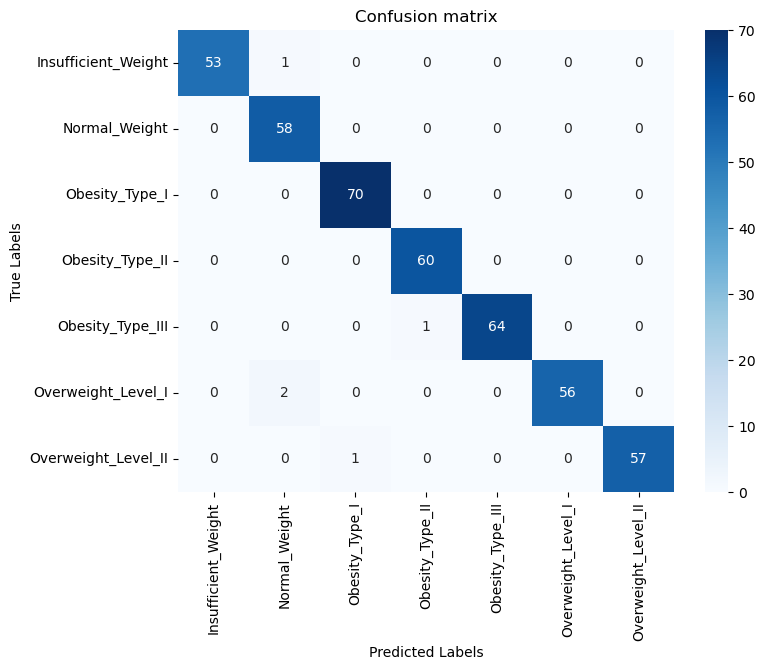

In [13]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')
plt.show()


In [91]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
572,0,19.084967,1.768435,49.597765,0,1,3.000000,3.725797,2,0,1.191401,0,2.000000,1.000000,2,3,15.859296
370,1,19.000000,1.800000,60.000000,0,1,2.000000,3.000000,2,0,1.000000,0,1.000000,1.000000,3,3,18.518519
1002,1,24.108711,1.700000,80.761409,1,1,2.000000,3.000000,2,0,2.879402,0,0.000000,0.322405,2,3,27.945124
1837,0,20.941943,1.812963,138.730619,1,1,3.000000,3.000000,2,0,2.641489,0,0.481555,0.735201,2,3,42.207968
1724,1,33.293166,1.696412,103.250355,1,1,2.679664,2.415522,2,0,1.000000,0,1.987296,0.000000,3,3,35.878054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1,30.628650,1.766975,118.363376,1,1,2.964319,3.000000,2,0,2.377257,0,0.614959,1.875023,2,0,37.910240
1161,1,18.181821,1.662669,79.863546,1,0,2.492758,2.270163,2,0,1.992586,0,1.452467,0.864583,3,3,28.889298
1537,1,30.870724,1.670774,101.626189,1,1,2.907744,3.990925,2,0,1.000000,0,1.999750,0.000000,3,3,36.405770
497,1,20.000000,1.560000,45.000000,0,0,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,2,3,18.491124


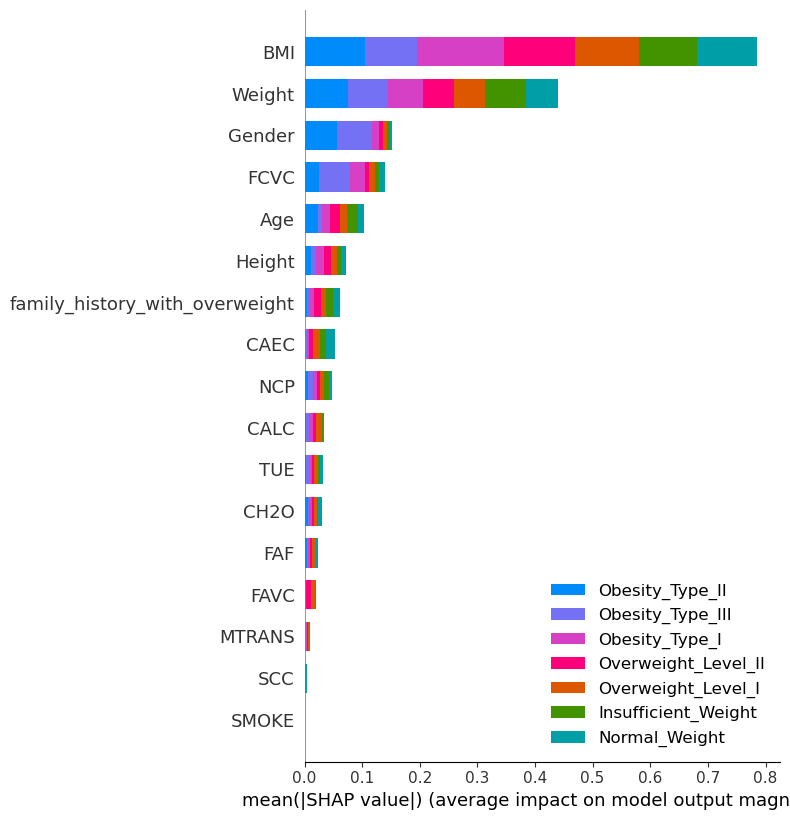

In [60]:
def shap_values_to_list(shap_values, model):
    shap_as_list=[]
    for i in range(len(model.classes_)):
        shap_as_list.append(shap_values[:,:,i])
    return shap_as_list


explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap_as_list = shap_values_to_list(shap_values, rf_model)
shap.summary_plot(shap_as_list, X_test, plot_type="bar", class_names=rf_model.classes_)


Insufficient_Weight


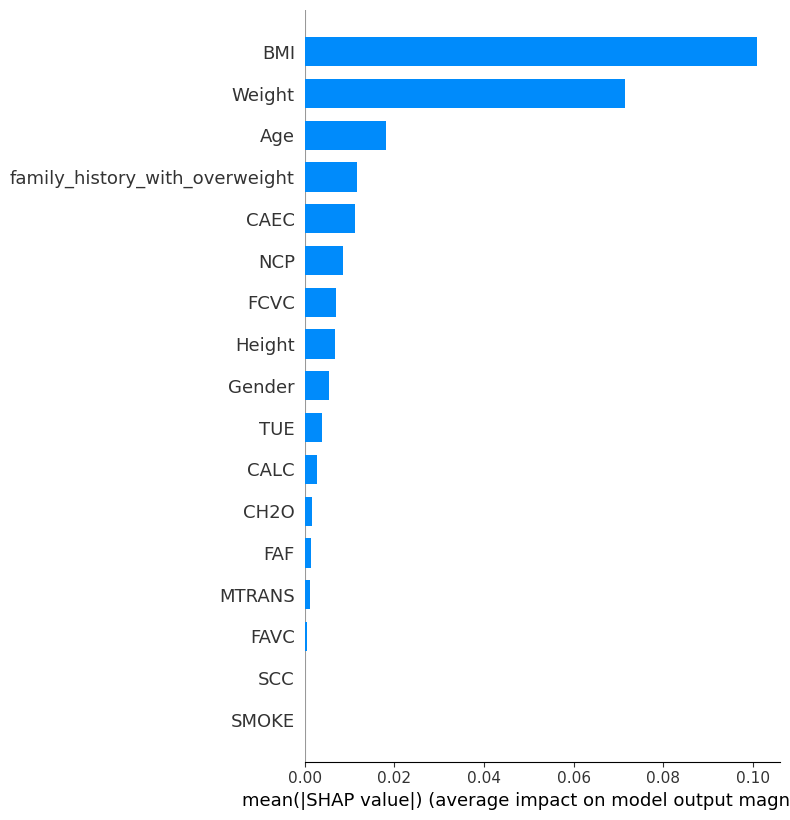

Normal_Weight


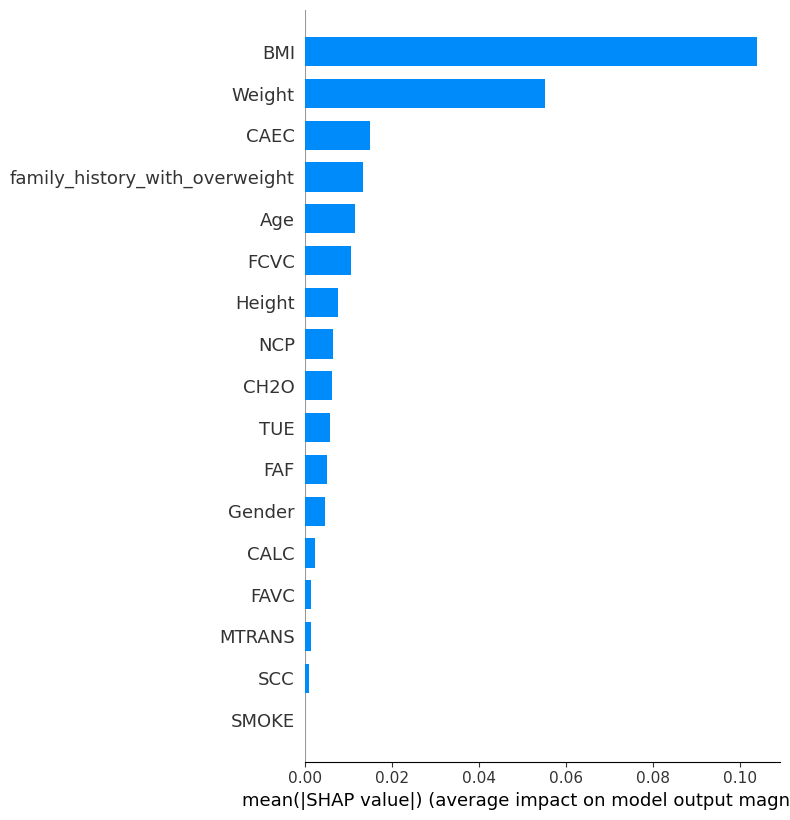

Obesity_Type_I


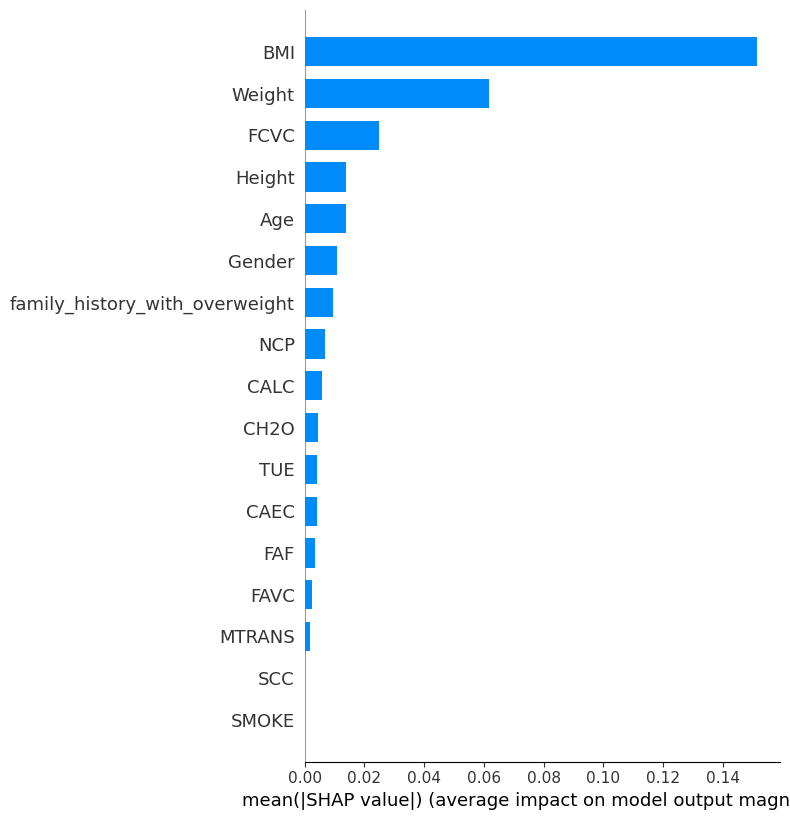

Obesity_Type_II


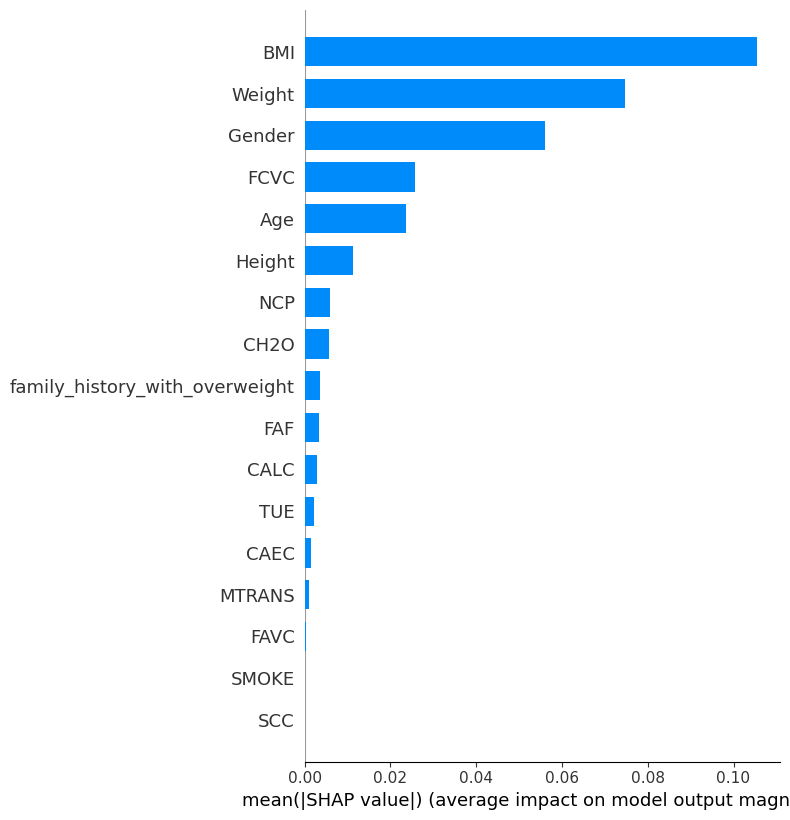

Obesity_Type_III


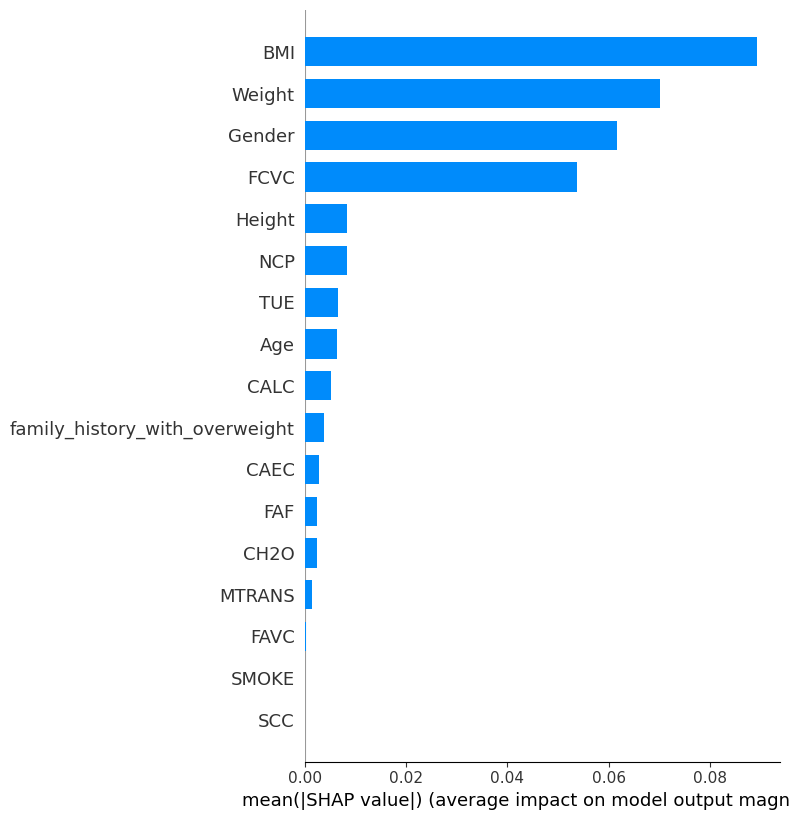

Overweight_Level_I


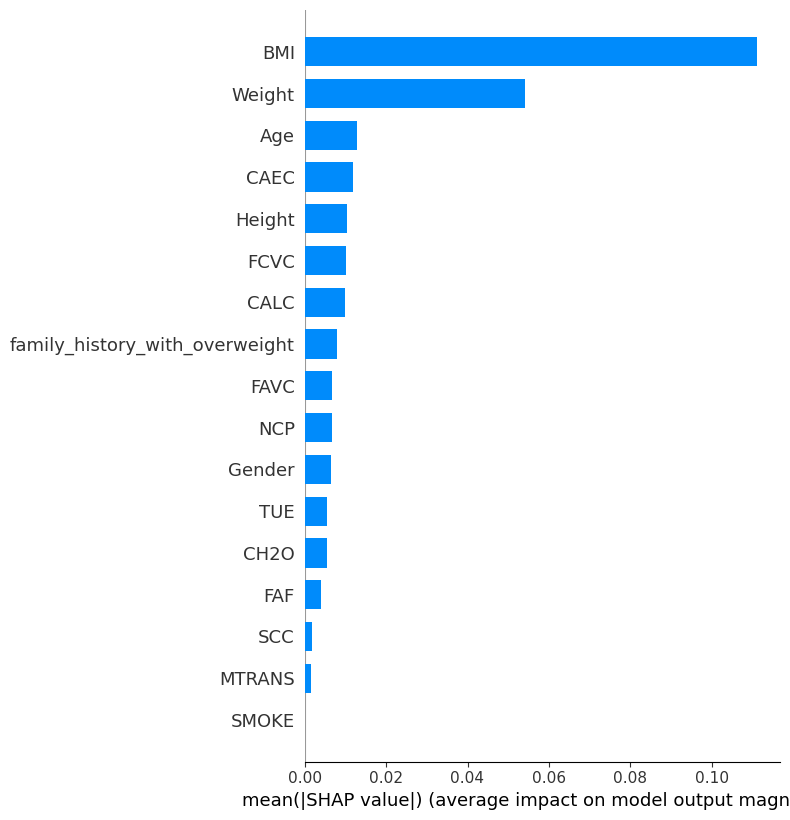

Overweight_Level_II


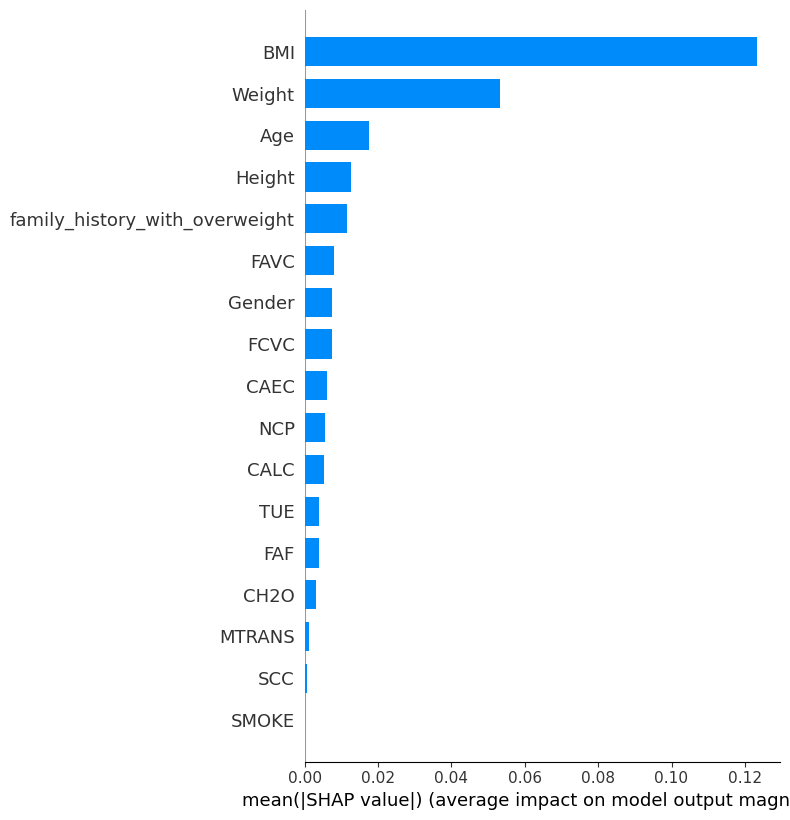

In [63]:
class_names= ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']
for class_index in range(len(class_names)):
    print(rf_model.classes_[class_index])
    shap.summary_plot(shap_values[:, :, class_index], X_test,plot_type = 'bar', class_names=rf_model.classes_[class_index])


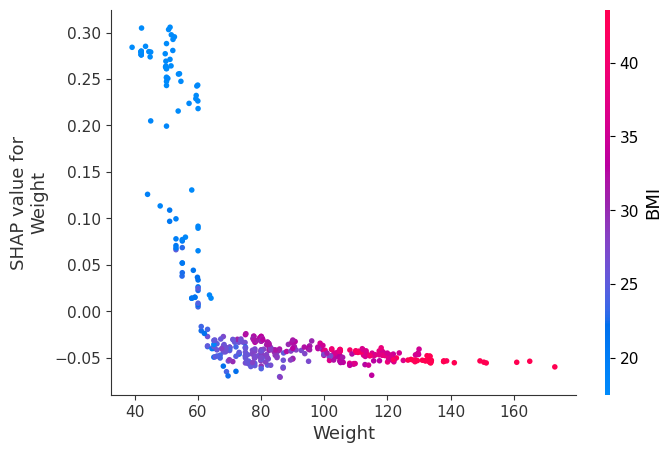

In [68]:
shap.dependence_plot("Weight", shap_as_list[0], X_test)

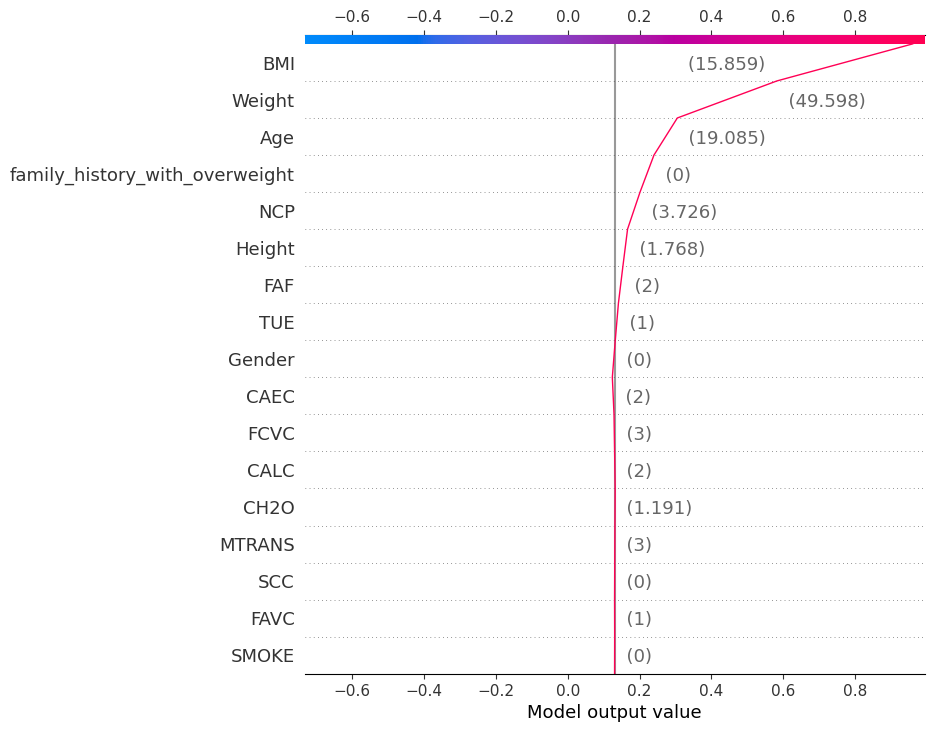

In [67]:
shap.decision_plot(explainer.expected_value[0], shap_as_list[0][0], X_test.iloc[0])